<a href="https://colab.research.google.com/github/wongalex349/BigDataAnalytics/blob/master/AnimeList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import pandas as pd

In [3]:
from google.colab import drive #importing onto google drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
base = '/content/drive/My Drive/Colab Notebooks/UserList.csv'
file = pd.read_csv(base)

In [5]:
file.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,3.026750e+05,302675.000000,302675.000000,302675.000000,302675.000000,302675.000000,3.026750e+05,0.0,302546.000000,302546.000000,3.025460e+05
mean,2.061401e+06,13.400007,166.638289,9.861796,10.550366,64.040430,6.907645e+01,NaN,7.120476,10.375460,4.846288e+03
std,2.118037e+06,34.747045,239.359931,34.270394,43.119854,157.485891,4.741020e+03,NaN,2.574451,44.239666,4.473811e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,2.322455e+05,2.000000,28.000000,0.000000,0.000000,2.000000,1.363000e+01,NaN,7.090000,0.000000,8.160000e+02
50%,1.167583e+06,6.000000,96.000000,2.000000,2.000000,20.000000,3.958000e+01,NaN,7.800000,0.000000,2.384000e+03
75%,3.883446e+06,14.000000,217.000000,10.000000,10.000000,68.000000,7.994000e+01,NaN,8.440000,6.000000,4.849000e+03
max,7.273306e+06,6370.000000,11536.000000,9729.000000,10823.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


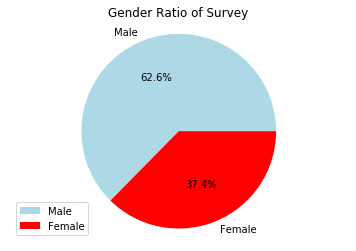

In [6]:
#What is the gender ratio between men and women that watch anime?
y = file[['gender']];
x_M = y[y.gender == 'Male'].gender.count();
x_F = y[y.gender == 'Female'].gender.count();
labels = 'Male','Female'
x = y.count();

perc_M = int(x_M/x * 100)
perc_F = int(x_F/x * 100)
size = [perc_M,perc_F]
colors = ['lightblue','red']
plt.pie(size, labels = labels, colors = colors,autopct='%1.1f%%')
plt.legend(labels)
plt.title('Gender Ratio of Survey')
plt.axis('equal')
plt.show()


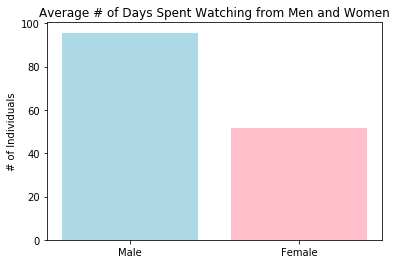

In [7]:
#On average, what is the difference between the average number of days men and women spend watching anime?
y = file[['gender']];
x = file[['user_days_spent_watching']]
y_M = x[y.gender == 'Male'].sum()
y_F = x[y.gender == 'Female'].sum()
x_M = y[y.gender == 'Male'].gender.count();
x_F = y[y.gender == 'Female'].gender.count();

avg_M = y_M/x_M
avg_F = y_F/x_F


plt.bar('Male',avg_M, color = 'lightblue');
plt.bar('Female',avg_F, color = 'pink');
plt.ylabel('# of Individuals');
plt.title('Average # of Days Spent Watching from Men and Women');
plt.show();

count    302546.000000
mean          7.261157
std           2.875925
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          15.000000
Name: join_date, dtype: float64

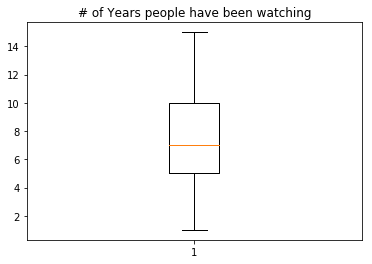

In [8]:
# How long people have been watching since they joined?
y = file[['join_date']];
x = file.join_date.str.slice(0,4).dropna().astype(int)
length = 2019 - x
plt.title('# of Years people have been watching')
plt.boxplot(length)
length.describe()

count    400.000000
mean      27.070000
std        6.443905
min        5.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       89.000000
Name: birth_date, dtype: float64

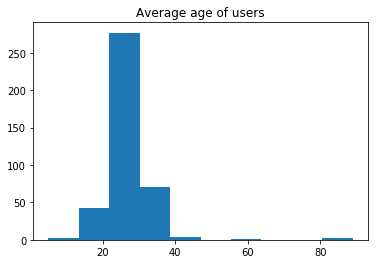

In [9]:
# What is the age range of the people who watch anime?
y = file[['birth_date']];
x = file.birth_date.str.slice(0,4).dropna()[100:500].astype(int) 
age = 2019 - x
plt.title('Average age of users')
plt.hist(age)
age.describe()

Text(0.5, 1.0, 'States and Countries that watch Anime')

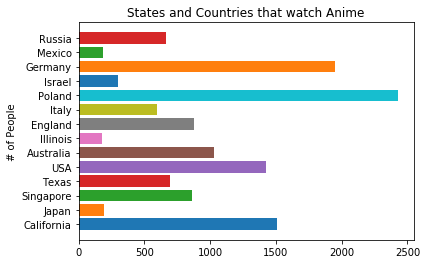

In [10]:
# Which regions of the world is anime most popular?
y = file[['location']];
x_cal = y[y.location == 'California'].location.count();
x_ny = y[y.location == 'New York'].location.count();
x_jap = y[y.location == 'Japan'].location.count();
x_sin = y[y.location == 'Singapore'].location.count();
x_tex = y[y.location == 'Texas'].location.count();
x_usa = y[y.location == 'USA'].location.count();
x_us = y[y.location == 'United States'].location.count();
x_ame = y[y.location == 'America'].location.count();
usa = x_usa + x_us + x_ame
x_aus = y[y.location == 'Australia'].location.count();
x_ill = y[y.location == 'Illinois'].location.count();
x_eng = y[y.location == 'England'].location.count();
x_it = y[y.location == 'Italy'].location.count();
x_pol = y[y.location == 'Poland'].location.count();
x_ger = y[y.location == 'Germany'].location.count();
x_is = y[y.location == 'Israel'].location.count();
x_mex = y[y.location == 'Mexico'].location.count();
x_rus = y[y.location == 'Russia'].location.count();

plt.barh('California',x_cal)
plt.barh('Japan',x_jap)
plt.barh('Singapore',x_sin)
plt.barh('Texas',x_tex)
plt.barh('USA',usa)
plt.barh('Australia',x_aus)
plt.barh('Illinois',x_ill)
plt.barh('England',x_eng)
plt.barh('Italy',x_it)
plt.barh('Poland',x_pol)
plt.barh('Israel',x_is)
plt.barh('Germany',x_ger)
plt.barh('Mexico',x_mex)
plt.barh('Russia',x_rus)
plt.ylabel('# of People')
plt.title('States and Countries that watch Anime')

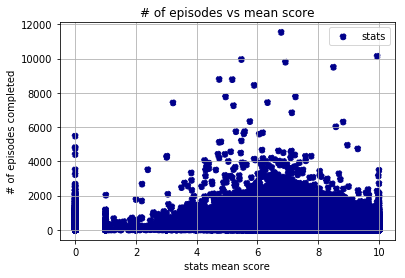

In [43]:
# Is there a correlation between the statistics how people rate episodes and the number of episodes they watch
x = file[['stats_mean_score']];
x = np.array(x);
x = x.ravel();
y = file[['user_completed']];
y = np.array(y);
y = y.ravel();
plt.scatter(x,y,color='darkblue',linestyle='--',label = "stats")
plt.ylabel('# of episodes completed');
plt.xlabel('stats mean score');
plt.title('# of episodes vs mean score');
plt.legend();
plt.grid();
plt.show();

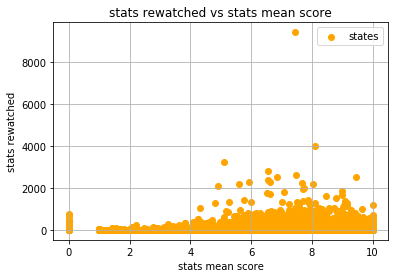

In [16]:
#Is there a relationship between the mean score of anime and how much people have begun to rewatch an anime?
plt.Figure();
x = file[['stats_mean_score']];
x = np.array(x);
x = x.ravel();
y = file[['stats_rewatched']];
y = np.array(y);
y = y.ravel();
plt.scatter(x,y,color='orange',label='states'); 
plt.ylabel('stats rewatched');
plt.xlabel('stats mean score');
plt.title('stats rewatched vs stats mean score');
plt.legend();
plt.grid();
plt.show();

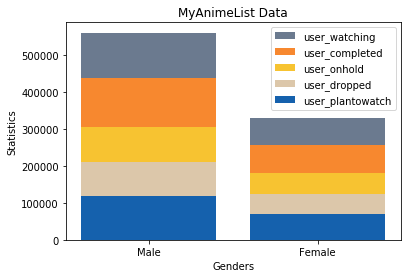

In [17]:
# How much do men and women how many animes have people watched, completed, dropped, and put on hold?
male = file[file.gender == 'Male'];
female = file[file.gender == 'Female'];

user_watching_M = male['user_watching'].astype(bool).sum(axis=0);
user_completed_M = male['user_completed'].astype(bool).sum(axis=0);
user_onhold_M = male['user_onhold'].astype(bool).sum(axis=0);
user_dropped_M = male['user_dropped'].astype(bool).sum(axis=0);
user_plantowatch_M = male['user_plantowatch'].astype(bool).sum(axis=0);

user_watching_F = female['user_watching'].astype(bool).sum(axis=0);
user_completed_F = female['user_completed'].astype(bool).sum(axis=0);
user_onhold_F = female['user_onhold'].astype(bool).sum(axis=0);
user_dropped_F = female['user_dropped'].astype(bool).sum(axis=0);
user_plantowatch_F = female['user_plantowatch'].astype(bool).sum(axis=0);

genders=['Male','Female'];
user_watching = np.array([user_watching_M,user_watching_F]);
user_completed = np.array([user_completed_M,user_completed_F]);    
user_onhold = np.array([user_onhold_M,user_onhold_F]);
user_dropped = np.array([user_dropped_M,user_dropped_F]);
user_plantowatch = np.array([user_plantowatch_M,user_plantowatch_F]); 
ind = [x for x, _ in enumerate(genders)];

plt.bar(ind,user_watching, width=0.8, label='user_watching', color='#6B7A8F',
        bottom = user_completed+user_onhold+user_dropped+user_plantowatch);
plt.bar(ind,user_completed, width=0.8, label='user_completed', color='#F7882F',
        bottom = user_onhold+user_dropped+user_plantowatch);
plt.bar(ind,user_onhold, width=0.8, label='user_onhold', color='#F7C331',
        bottom = user_dropped+user_plantowatch);
plt.bar(ind,user_dropped, width=0.8, label='user_dropped', color='#DCC7AA',
        bottom = user_plantowatch);
plt.bar(ind,user_plantowatch, width=0.8, label='user_plantowatch', color='#1561ad');

plt.xticks(ind, genders)
plt.ylabel("Statistics")
plt.xlabel("Genders")
plt.legend(loc="upper right")
plt.title("MyAnimeList Data")
plt.show()

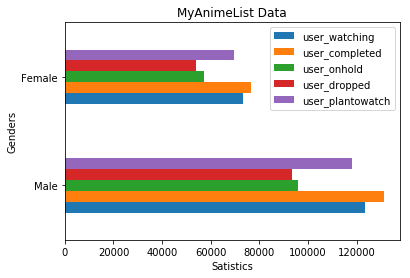

In [18]:
# Is there a difference between men and women in relation to how much they drop, watch, complete, and place anime on hold?
male = file[file.gender == 'Male'];
female = file[file.gender == 'Female'];

user_watching_M = male['user_watching'].astype(bool).sum(axis=0);
user_completed_M = male['user_completed'].astype(bool).sum(axis=0);
user_onhold_M = male['user_onhold'].astype(bool).sum(axis=0);
user_dropped_M = male['user_dropped'].astype(bool).sum(axis=0);
user_plantowatch_M = male['user_plantowatch'].astype(bool).sum(axis=0);

user_watching_F = female['user_watching'].astype(bool).sum(axis=0);
user_completed_F = female['user_completed'].astype(bool).sum(axis=0);
user_onhold_F = female['user_onhold'].astype(bool).sum(axis=0);
user_dropped_F = female['user_dropped'].astype(bool).sum(axis=0);
user_plantowatch_F = female['user_plantowatch'].astype(bool).sum(axis=0);

genders=['Male','Female'];
user_watching = np.array([user_watching_M,user_watching_F]);
user_completed = np.array([user_completed_M,user_completed_F]);    
user_onhold = np.array([user_onhold_M,user_onhold_F]);
user_dropped = np.array([user_dropped_M,user_dropped_F]);
user_plantowatch = np.array([user_plantowatch_M,user_plantowatch_F]); 

df = pd.DataFrame({'user_watching': user_watching,
                   'user_completed': user_completed,
                   'user_onhold': user_onhold,
                   'user_dropped': user_dropped,
                   'user_plantowatch': user_plantowatch},
                    index=genders);
df.plot.barh();

plt.ylabel("Genders")
plt.xlabel("Satistics")
plt.legend(loc="upper right")
plt.title("MyAnimeList Data")
plt.show()

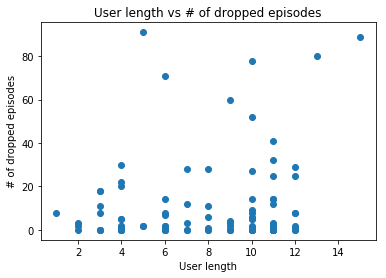

In [38]:
#Is there a correlation between how long people have been watching and how much anime users have dropped?
y = file[['user_dropped']][0:100];
t = file[['join_date']][0:100];
x = file.join_date.str.slice(0,4).dropna().astype(int)[0:100]
length = 2019 - x
plt.xlabel('User length')
plt.ylabel('# of dropped episodes')
plt.title('User length vs # of dropped episodes')
plt.scatter(length,y)